#Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as plt
import sqlite3 as sql
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Tratamento Inicial dos Dados Brutos

In [3]:
Ibovespa = pd.read_csv('/content/Dados HistoÃÅricos - Ibovespa.csv')
Ibovespa

Data   √öltimo  Abertura   M√°xima   M√≠nima     Vol.    Var%
0     10.07.2025  136.743   137.472  137.472  136.014    9,57M  -0,54%
1     09.07.2025  137.481   139.303  139.331  137.299    7,58B  -1,31%
2     08.07.2025  139.303   139.491  139.591  138.770    6,75B  -0,13%
3     07.07.2025  139.490   141.265  141.342  139.295    6,12B  -1,26%
4     04.07.2025  141.264   140.928  141.564  140.597    3,31B   0,24%
...          ...      ...       ...      ...      ...      ...     ...
4949  15.07.2005   25.222    25.916   25.916   25.222   72,88M  -2,69%
4950  14.07.2005   25.920    25.859   26.142   25.725  113,35M   0,25%
4951  13.07.2005   25.856    25.557   26.043   25.557  107,28M   1,25%
4952  12.07.2005   25.536    25.027   25.576   24.932   94,91M   2,08%
4953  11.07.2005   25.016    24.425   25.032   24.425  100,42M   2,43%

[4954 rows x 7 columns]

In [4]:
# Tratando as Datas, para podermos trabalhar o modelo com base nos dias
Ibovespa['Data'] = pd.to_datetime(Ibovespa['Data'], format='%d.%m.%Y')
Ibovespa = Ibovespa.sort_values(by='Data', ascending=True).reset_index(drop=True)
Ibovespa

Data   √öltimo  Abertura   M√°xima   M√≠nima     Vol.    Var%
0    2005-07-11   25.016    24.425   25.032   24.425  100,42M   2,43%
1    2005-07-12   25.536    25.027   25.576   24.932   94,91M   2,08%
2    2005-07-13   25.856    25.557   26.043   25.557  107,28M   1,25%
3    2005-07-14   25.920    25.859   26.142   25.725  113,35M   0,25%
4    2005-07-15   25.222    25.916   25.916   25.222   72,88M  -2,69%
...         ...      ...       ...      ...      ...      ...     ...
4949 2025-07-04  141.264   140.928  141.564  140.597    3,31B   0,24%
4950 2025-07-07  139.490   141.265  141.342  139.295    6,12B  -1,26%
4951 2025-07-08  139.303   139.491  139.591  138.770    6,75B  -0,13%
4952 2025-07-09  137.481   139.303  139.331  137.299    7,58B  -1,31%
4953 2025-07-10  136.743   137.472  137.472  136.014    9,57M  -0,54%

[4954 rows x 7 columns]

In [5]:
Ibovespa['Vol.'].unique()

array(['100,42M', '94,91M', '107,28M', ..., '6,12B', '6,75B', '7,58B'],
      dtype=object)

In [6]:
#Criando uma Coluna para separa o Volume -  milhoes e bilhoes - em colunas diferentes. Eu realmente nao sei se o volume √© estatisticamente significante para o modelo, entao vale a pena deixar organizado
#Criando as colunas
Ibovespa['Milhoes'] = 0.0
Ibovespa['Bilhoes'] = 0.0
for index, row in Ibovespa.iterrows():
    volume_str = str(row['Vol.'])
    if 'M' in volume_str:
        # Remover 'M', substituir "," por "."", converter em float
        value = float(volume_str.replace('M', '').replace(',', '.'))
        Ibovespa.loc[index, 'Milhoes'] = value
    elif 'B' in volume_str:
        # Remover 'B',  substituir "," por "."", converter em float
        value = float(volume_str.replace('B', '').replace(',', '.'))
        Ibovespa.loc[index, 'Bilhoes'] = value

Ibovespa

Data   √öltimo  Abertura   M√°xima   M√≠nima     Vol.    Var%  \
0    2005-07-11   25.016    24.425   25.032   24.425  100,42M   2,43%   
1    2005-07-12   25.536    25.027   25.576   24.932   94,91M   2,08%   
2    2005-07-13   25.856    25.557   26.043   25.557  107,28M   1,25%   
3    2005-07-14   25.920    25.859   26.142   25.725  113,35M   0,25%   
4    2005-07-15   25.222    25.916   25.916   25.222   72,88M  -2,69%   
...         ...      ...       ...      ...      ...      ...     ...   
4949 2025-07-04  141.264   140.928  141.564  140.597    3,31B   0,24%   
4950 2025-07-07  139.490   141.265  141.342  139.295    6,12B  -1,26%   
4951 2025-07-08  139.303   139.491  139.591  138.770    6,75B  -0,13%   
4952 2025-07-09  137.481   139.303  139.331  137.299    7,58B  -1,31%   
4953 2025-07-10  136.743   137.472  137.472  136.014    9,57M  -0,54%   

      Milhoes  Bilhoes  
0      100.42     0.00  
1       94.91     0.00  
2      107.28     0.00  
3      113.35     0.00  
4       72.88     0.00  
...       ...      ...  
4949     0.00     3.31  
4950     0.00     6.12  
4951     0.00     6.75  
4952     0.00     7.58  
4953     9.57     0.00  

[4954 rows x 9 columns]

In [7]:
#Calculando a varia√ß√£o do dia anterior
Ibovespa['Fechamento_Amanha'] = Ibovespa['√öltimo'].shift(1)
Ibovespa

Data   √öltimo  Abertura   M√°xima   M√≠nima     Vol.    Var%  \
0    2005-07-11   25.016    24.425   25.032   24.425  100,42M   2,43%   
1    2005-07-12   25.536    25.027   25.576   24.932   94,91M   2,08%   
2    2005-07-13   25.856    25.557   26.043   25.557  107,28M   1,25%   
3    2005-07-14   25.920    25.859   26.142   25.725  113,35M   0,25%   
4    2005-07-15   25.222    25.916   25.916   25.222   72,88M  -2,69%   
...         ...      ...       ...      ...      ...      ...     ...   
4949 2025-07-04  141.264   140.928  141.564  140.597    3,31B   0,24%   
4950 2025-07-07  139.490   141.265  141.342  139.295    6,12B  -1,26%   
4951 2025-07-08  139.303   139.491  139.591  138.770    6,75B  -0,13%   
4952 2025-07-09  137.481   139.303  139.331  137.299    7,58B  -1,31%   
4953 2025-07-10  136.743   137.472  137.472  136.014    9,57M  -0,54%   

      Milhoes  Bilhoes  Fechamento_Amanha  
0      100.42     0.00                NaN  
1       94.91     0.00             25.016  
2      107.28     0.00             25.536  
3      113.35     0.00             25.856  
4       72.88     0.00             25.920  
...       ...      ...                ...  
4949     0.00     3.31            140.928  
4950     0.00     6.12            141.264  
4951     0.00     6.75            139.490  
4952     0.00     7.58            139.303  
4953     9.57     0.00            137.481  

[4954 rows x 10 columns]

In [8]:
#Criando a coluna 'Tend√™ncia_Fechamento'
Ibovespa_cleaned = Ibovespa.dropna(subset=['Fechamento_Amanha']).copy()
Ibovespa_cleaned['Tend√™ncia_Fechamento'] = (Ibovespa_cleaned['Fechamento_Amanha'] > Ibovespa_cleaned['√öltimo']).astype(int)
Ibovespa = Ibovespa_cleaned
Ibovespa

Data   √öltimo  Abertura   M√°xima   M√≠nima     Vol.    Var%  \
1    2005-07-12   25.536    25.027   25.576   24.932   94,91M   2,08%   
2    2005-07-13   25.856    25.557   26.043   25.557  107,28M   1,25%   
3    2005-07-14   25.920    25.859   26.142   25.725  113,35M   0,25%   
4    2005-07-15   25.222    25.916   25.916   25.222   72,88M  -2,69%   
5    2005-07-18   25.321    25.222   25.412   24.916   52,17M   0,39%   
...         ...      ...       ...      ...      ...      ...     ...   
4949 2025-07-04  141.264   140.928  141.564  140.597    3,31B   0,24%   
4950 2025-07-07  139.490   141.265  141.342  139.295    6,12B  -1,26%   
4951 2025-07-08  139.303   139.491  139.591  138.770    6,75B  -0,13%   
4952 2025-07-09  137.481   139.303  139.331  137.299    7,58B  -1,31%   
4953 2025-07-10  136.743   137.472  137.472  136.014    9,57M  -0,54%   

      Milhoes  Bilhoes  Fechamento_Amanha  Tend√™ncia_Fechamento  
1       94.91     0.00             25.016                     0  
2      107.28     0.00             25.536                     0  
3      113.35     0.00             25.856                     0  
4       72.88     0.00             25.920                     1  
5       52.17     0.00             25.222                     0  
...       ...      ...                ...                   ...  
4949     0.00     3.31            140.928                     0  
4950     0.00     6.12            141.264                     1  
4951     0.00     6.75            139.490                     1  
4952     0.00     7.58            139.303                     1  
4953     9.57     0.00            137.481                     1  

[4953 rows x 11 columns]

In [9]:
#Filtrando apenas as colunas necessarias para ver o que d√°
df = (
    Ibovespa
    .rename(columns= {"M√°xima": "Maxima", "M√≠nima": "Minima", "√öltimo": "Fechamento", "Tend√™ncia_Fechamento":"Tendencia"})
    .filter(items=['Data','Fechamento', 'Abertura', 'Maxima', 'Minima', 'Milhoes', 'Bilhoes', 'Tendencia'])
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4953 entries, 1 to 4953
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        4953 non-null   datetime64[ns]
 1   Fechamento  4953 non-null   float64       
 2   Abertura    4953 non-null   float64       
 3   Maxima      4953 non-null   float64       
 4   Minima      4953 non-null   float64       
 5   Milhoes     4953 non-null   float64       
 6   Bilhoes     4953 non-null   float64       
 7   Tendencia   4953 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 348.3 KB


In [10]:
#Trabalhando a coluna milhoes, multiplicando todas as linhas por 1000000
df['Milhoes'] = df['Milhoes']*1000000
df.head()

Data  Fechamento  Abertura  Maxima  Minima      Milhoes  Bilhoes  \
1 2005-07-12      25.536    25.027  25.576  24.932   94910000.0      0.0   
2 2005-07-13      25.856    25.557  26.043  25.557  107280000.0      0.0   
3 2005-07-14      25.920    25.859  26.142  25.725  113350000.0      0.0   
4 2005-07-15      25.222    25.916  25.916  25.222   72880000.0      0.0   
5 2005-07-18      25.321    25.222  25.412  24.916   52170000.0      0.0   

   Tendencia  
1          0  
2          0  
3          0  
4          1  
5          0

In [11]:
#Trabalhando a coluna bilhoes, multiplicando todas as linhas por 1000000000
df['Bilhoes'] = df['Bilhoes']*1000000000
df.head()

Data  Fechamento  Abertura  Maxima  Minima      Milhoes  Bilhoes  \
1 2005-07-12      25.536    25.027  25.576  24.932   94910000.0      0.0   
2 2005-07-13      25.856    25.557  26.043  25.557  107280000.0      0.0   
3 2005-07-14      25.920    25.859  26.142  25.725  113350000.0      0.0   
4 2005-07-15      25.222    25.916  25.916  25.222   72880000.0      0.0   
5 2005-07-18      25.321    25.222  25.412  24.916   52170000.0      0.0   

   Tendencia  
1          0  
2          0  
3          0  
4          1  
5          0

In [12]:
#Utilizando um join para juntar as colunas, e criando uma unica coluna chamada "Volume"
df['Volume'] = df['Milhoes'] + df['Bilhoes']
df.head()

Data  Fechamento  Abertura  Maxima  Minima      Milhoes  Bilhoes  \
1 2005-07-12      25.536    25.027  25.576  24.932   94910000.0      0.0   
2 2005-07-13      25.856    25.557  26.043  25.557  107280000.0      0.0   
3 2005-07-14      25.920    25.859  26.142  25.725  113350000.0      0.0   
4 2005-07-15      25.222    25.916  25.916  25.222   72880000.0      0.0   
5 2005-07-18      25.321    25.222  25.412  24.916   52170000.0      0.0   

   Tendencia       Volume  
1          0   94910000.0  
2          0  107280000.0  
3          0  113350000.0  
4          1   72880000.0  
5          0   52170000.0

In [13]:
#Excluindo as colunas Milhoes e Bilhoes
df = df.drop(['Milhoes', 'Bilhoes'], axis=1)
df.head()

Data  Fechamento  Abertura  Maxima  Minima  Tendencia       Volume
1 2005-07-12      25.536    25.027  25.576  24.932          0   94910000.0
2 2005-07-13      25.856    25.557  26.043  25.557          0  107280000.0
3 2005-07-14      25.920    25.859  26.142  25.725          0  113350000.0
4 2005-07-15      25.222    25.916  25.916  25.222          1   72880000.0
5 2005-07-18      25.321    25.222  25.412  24.916          0   52170000.0

In [14]:
#Estabelecendo a coluna data como indice
df = df.set_index('Data')
df.head()

Fechamento  Abertura  Maxima  Minima  Tendencia       Volume
Data                                                                    
2005-07-12      25.536    25.027  25.576  24.932          0   94910000.0
2005-07-13      25.856    25.557  26.043  25.557          0  107280000.0
2005-07-14      25.920    25.859  26.142  25.725          0  113350000.0
2005-07-15      25.222    25.916  25.916  25.222          1   72880000.0
2005-07-18      25.321    25.222  25.412  24.916          0   52170000.0

#Normalzando os Valores de Abertura, Fechamento e Volume

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(df[['Fechamento']])
df[['Fechamento']] = scaled_df
scaled_df1 = scaler.fit_transform(df[['Abertura']])
df[['Abertura']] = scaled_df1
scaled_df2 = scaler.fit_transform(df[['Volume']])
df[['Volume']] = scaled_df2
scaled_df3 = scaler.fit_transform(df[['Maxima']])
df[['Maxima']] = scaled_df3
scaled_df4= scaler.fit_transform(df[['Minima']])
df[['Minima']] = scaled_df4
df.tail()
#para retornar os valores ao original utilizar a funcao scaler.inverse_transform(scaleed_df)

Fechamento  Abertura    Maxima    Minima  Tendencia    Volume
Data                                                                     
2025-07-04    1.000000  0.997114  1.000000  1.000000          0  0.133092
2025-07-07    0.984803  1.000000  0.998097  0.988802          1  0.246080
2025-07-08    0.983201  0.984806  0.983088  0.984286          1  0.271411
2025-07-09    0.967593  0.983196  0.980860  0.971635          1  0.304785
2025-07-10    0.961271  0.967514  0.964925  0.960583          1  0.000385

In [96]:
#Reorganizando a ordem das colunas, para que a coluna Tendencia fique por ultimo
df = df[[ 'Fechamento','Abertura', 'Maxima', 'Minima', 'Volume', 'Tendencia']]
df.head()

Fechamento  Abertura    Maxima    Minima    Volume  Tendencia
Data                                                                     
2005-07-12    0.008609  0.004462  0.005803  0.005195  0.003816          0
2005-07-13    0.011351  0.009001  0.009806  0.010570  0.004314          0
2005-07-14    0.011899  0.011588  0.010654  0.012015  0.004558          0
2005-07-15    0.005919  0.012076  0.008717  0.007689  0.002930          1
2005-07-18    0.006768  0.006132  0.004397  0.005057  0.002098          0

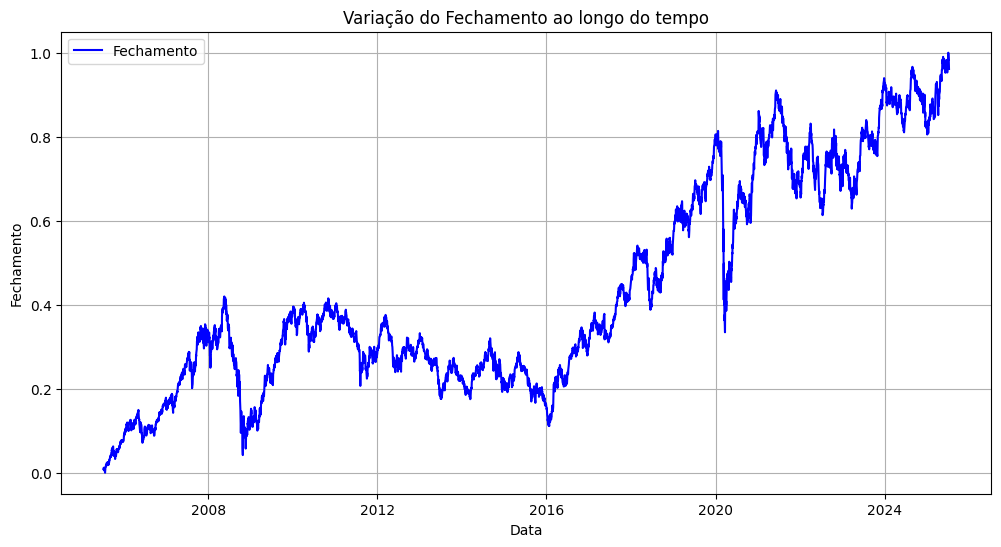

In [98]:
#Plotando o Fechamento no tempo
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Fechamento'], label='Fechamento', color='blue')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Varia√ß√£o do Fechamento ao longo do tempo')
plt.legend()
plt.grid(True)
plt.show()


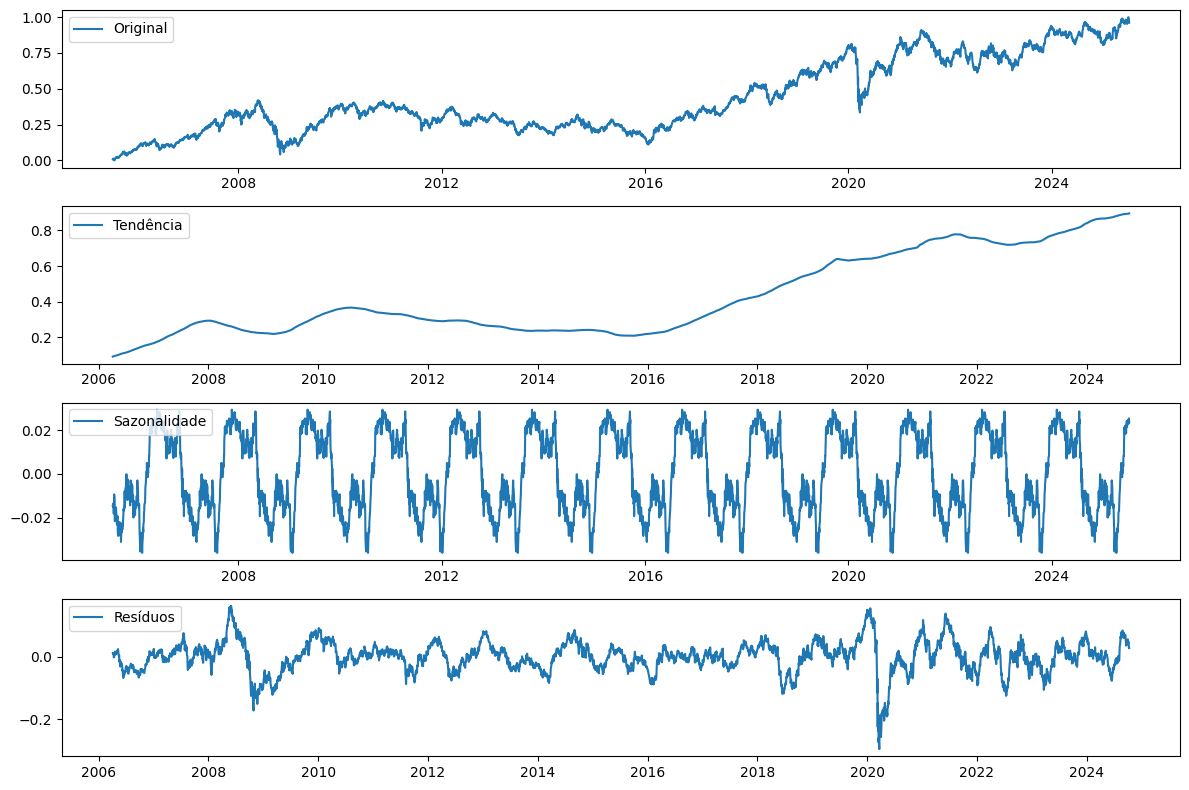

In [100]:
#Retirando a sazonaldiade da s√©rie
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Fechamento'], model='additive', period=365)
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df.index, df['Fechamento'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(df.index, result.trend, label='Tend√™ncia')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(df.index, result.seasonal, label='Sazonalidade')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(df.index, result.resid, label='Res√≠duos')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [97]:
#Dividindo o Dataset para tratamento
x = df.drop('Tendencia', axis=1)
y = df['Tendencia']
#Identificando a propor√ß√£o dos processos em que houve pagamento, para identificar o balanceamento
y.value_counts()

Tendencia
0    2577
1    2376
Name: count, dtype: int64

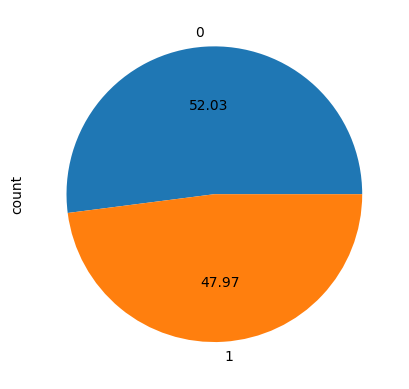

In [18]:
#Plotando um gr√°fico para ver visualmente a diferen√ßa, em termos de propro√ß√£o
y.value_counts().plot.pie(autopct='%.2f');

- Analisando o nosso dataset, √© poss√≠vel verificar que est√° pr√≥ximo ao balanceamento. Com base nessa premissa, vamos iniciar os testes para dar seguimento aos modelos

#Separando o DataSet em Treino e Teste

In [21]:
#Fazendo o Split de Treino e Teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, stratify=y)

##Verificando o balanceamento da base

In [22]:
#Verificando novamente a proporcao
y_train.value_counts()/y_train.shape[0]*100

Tendencia
0    52.019289
1    47.980711
Name: count, dtype: float64

In [23]:
y_test.value_counts()/y_test.shape[0]*100

Tendencia
0    52.04893
1    47.95107
Name: count, dtype: float64

- Como esperado, os valores seguem bem semelhantes, de modo que acreditamos que o modelo se encontra razoavelmente balanceado para os testes.

#Criando o Modelo de Regress√£o Log√≠stica

In [83]:
# Criando o Modelo de Regressao Logistica para Teste
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#Criando o Modelo
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
# Criando o pipeline com padroniza√ß√£o + Regress√£o Log√≠stica
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='liblinear', random_state=42)
)

# Treinando o modelo
pipeline.fit(x_train, y_train)

# Previs√µes
y_probs = pipeline.predict_proba(x_test)[:, 1]
y_pred = (y_probs >= 0.5).astype(int)

##Verificando a Performace do Modelo LR - LOGIT

In [84]:
# Prevendo as probabildiades do modelo xtest
y_probs = pipeline.predict(x_test)

# Classificando o modelo
y_pred = (y_probs >= 0.5).astype(int) # Assuming 0.5 as the threshold

# Calculando as Metricas
# Calculate the AUC - ROC score
roc_auc = roc_auc_score(y_test, y_probs)

# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"AUC - ROC Score: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

AUC - ROC Score: 0.94
Accuracy: 0.94
Precision: 1.00
Recall: 0.87
F1 Score: 0.93


##Plotando a Curva ROC

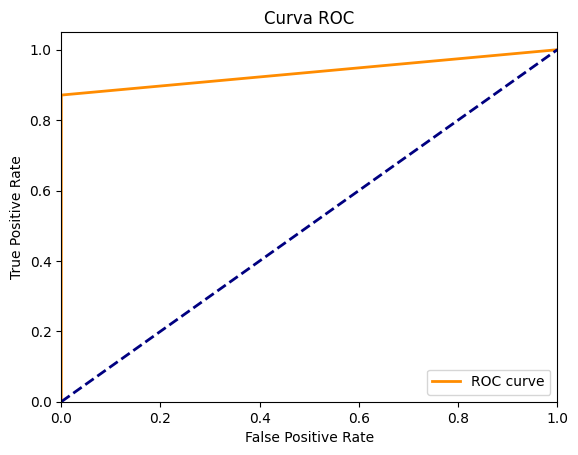

In [85]:
# Fazendo a Plotagem
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

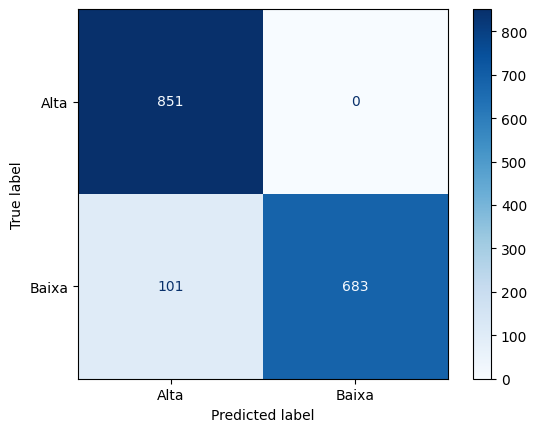

              precision    recall  f1-score   support

        Alta       0.89      1.00      0.94       851
       Baixa       1.00      0.87      0.93       784

    accuracy                           0.94      1635
   macro avg       0.95      0.94      0.94      1635
weighted avg       0.94      0.94      0.94      1635



In [86]:
#Criando a Matriz de Confusao
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
y_pred = (y_probs >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
labels = ['Alta', 'Baixa']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, y_pred, target_names=labels))

#Avaliando as m√©tricas do modelo LR

## Valida√ß√£o Cruzada


--- Avalia√ß√£o no Conjunto de Teste ---
AUC - ROC Score: 0.94
Accuracy: 0.94
Precision: 1.00
Recall: 0.87
F1 Score: 0.93

--- Avalia√ß√£o no Conjunto de Treinamento ---
Accuracy (train): 0.93
Precision (train): 1.00
Recall (train): 0.86
F1 Score (train): 0.93

--- Compara√ß√£o de Overfitting ---
Accuracy Train: 0.93 | Accuracy Test: 0.94

--- Valida√ß√£o Cruzada (F1 Score) ---
F1 Scores por fold: [0.91 0.92 0.91 0.91 0.89]
F1 Score m√©dio: 0.91
Desvio padr√£o: 0.01


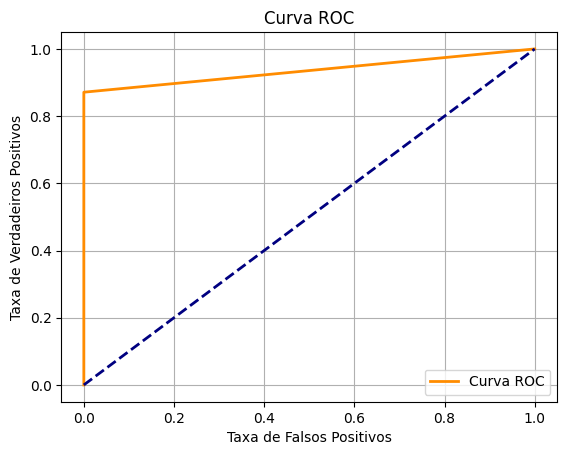

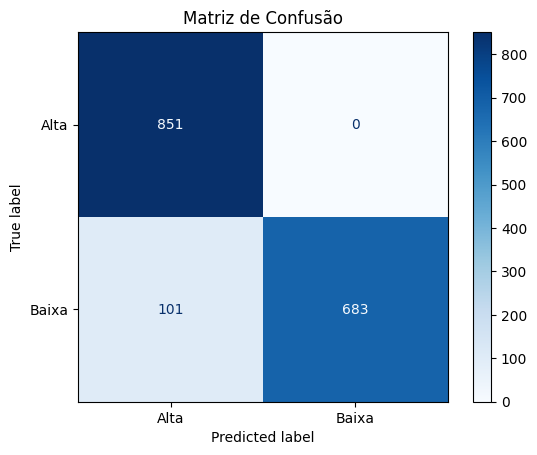


--- Relat√≥rio de Classifica√ß√£o ---
              precision    recall  f1-score   support

        Alta       0.89      1.00      0.94       851
       Baixa       1.00      0.87      0.93       784

    accuracy                           0.94      1635
   macro avg       0.95      0.94      0.94      1635
weighted avg       0.94      0.94      0.94      1635



In [87]:
# Importa√ß√µes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# M√©tricas no TESTE
print("\n--- Avalia√ß√£o no Conjunto de Teste ---")
print(f"AUC - ROC Score: {roc_auc_score(y_test, y_probs):.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")

# M√©tricas no TREINAMENTO (para overfitting)
y_train_probs = pipeline.predict_proba(x_train)[:, 1]
y_train_pred = (y_train_probs >= 0.5).astype(int)

print("\n--- Avalia√ß√£o no Conjunto de Treinamento ---")
print(f"Accuracy (train): {accuracy_score(y_train, y_train_pred):.2f}")
print(f"Precision (train): {precision_score(y_train, y_train_pred):.2f}")
print(f"Recall (train): {recall_score(y_train, y_train_pred):.2f}")
print(f"F1 Score (train): {f1_score(y_train, y_train_pred):.2f}")

# Compara√ß√£o direta
print("\n--- Compara√ß√£o de Overfitting ---")
print(f"Accuracy Train: {accuracy_score(y_train, y_train_pred):.2f} | Accuracy Test: {accuracy_score(y_test, y_pred):.2f}")

# Valida√ß√£o Cruzada (5-fold com F1 Score)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, x_train, y_train, cv=cv, scoring='f1')

print("\n--- Valida√ß√£o Cruzada (F1 Score) ---")
print("F1 Scores por fold:", np.round(cv_scores, 2))
print("F1 Score m√©dio:", np.mean(cv_scores).round(2))
print("Desvio padr√£o:", np.std(cv_scores).round(2))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Matriz de Confus√£o
cm = confusion_matrix(y_test, y_pred)
labels = ['Alta', 'Baixa']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confus√£o")
plt.show()

# Relat√≥rio de Classifica√ß√£o
print("\n--- Relat√≥rio de Classifica√ß√£o ---")
print(classification_report(y_test, y_pred, target_names=labels))


In [93]:
#Overfiting
# Avalia√ß√£o do Modelo no Conjunto de Treinamento
y_train_probs = pipeline.predict(x_train)
y_train_pred = (y_train_probs >= 0.5).astype(int)

# M√©tricas no Treinamento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, zero_division=0)
train_recall = recall_score(y_train, y_train_pred, zero_division=0)
train_f1 = f1_score(y_train, y_train_pred, zero_division=0)

print("\n--- Avalia√ß√£o no Treinamento ---")
print(f"Accuracy (train): {train_accuracy:.2f}")
print(f"Precision (train): {train_precision:.2f}")
print(f"Recall (train): {train_recall:.2f}")
print(f"F1 Score (train): {train_f1:.2f}")


# Comparar com os valores de teste j√° calculados anteriormente
print("\n--- Compara√ß√£o Treinamento vs Teste ---")
print(f"Overfitting? -> Accuracy Train: {train_accuracy:.2f} | Accuracy Test: {accuracy:.2f}")
if train_accuracy - accuracy > 0.10:
    print("‚ö†Ô∏è Ind√≠cio de Overfitting")
else:
    print("‚úÖ Sem evid√™ncia forte de overfitting")


--- Avalia√ß√£o no Treinamento ---
Accuracy (train): 0.93
Precision (train): 1.00
Recall (train): 0.86
F1 Score (train): 0.93

--- Compara√ß√£o Treinamento vs Teste ---
Overfitting? -> Accuracy Train: 0.93 | Accuracy Test: 0.94
‚úÖ Sem evid√™ncia forte de overfitting


## O modelo foi capaz de prever com precis√£o a tend√™ncia e teve boa performace na an√°lise de overfiting.

# Utilizando outros modelos de classifica√ß√£o


In [94]:
#Importando Bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np

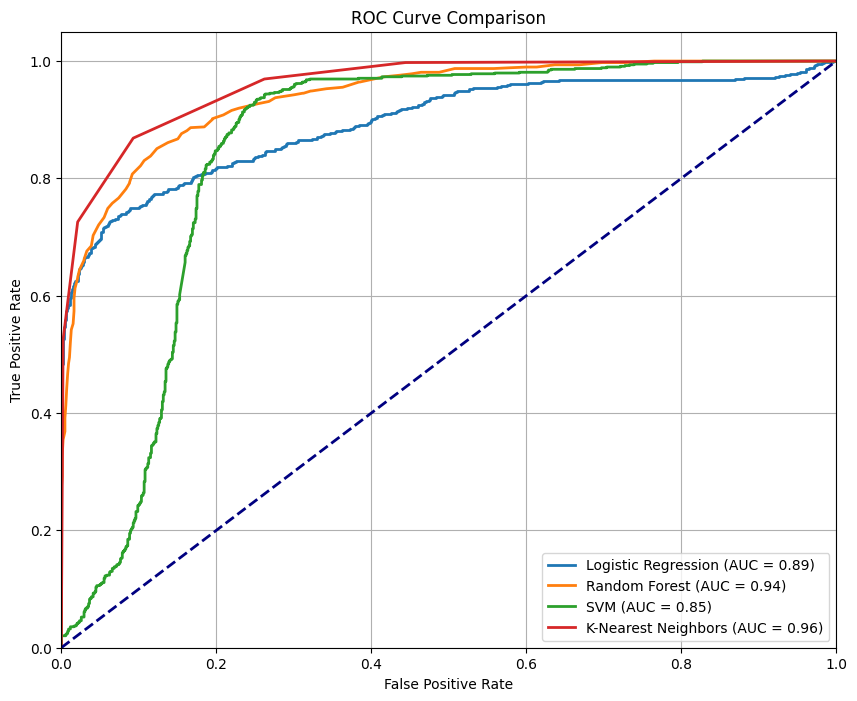


üìä Modelo: Logistic Regression
  - Teste:
    AUC: 0.89
    Accuracy: 0.59
    Precision: 1.00
    Recall: 0.14
    F1: 0.24
  - Treinamento:
    AUC: 0.91
    Accuracy: 0.59
    Precision: 1.00
    Recall: 0.14
    F1: 0.24
  üîç Overfitting Check (F1): ‚úÖ Sem evid√™ncia forte de overfitting

üìä Modelo: Random Forest
  - Teste:
    AUC: 0.94
    Accuracy: 0.86
    Precision: 0.87
    Recall: 0.84
    F1: 0.85
  - Treinamento:
    AUC: 1.00
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1: 1.00
  üîç Overfitting Check (F1): ‚ö†Ô∏è Ind√≠cio de Overfitting

üìä Modelo: SVM
  - Teste:
    AUC: 0.85
    Accuracy: 0.75
    Precision: 0.79
    Recall: 0.66
    F1: 0.72
  - Treinamento:
    AUC: 0.87
    Accuracy: 0.76
    Precision: 0.80
    Recall: 0.66
    F1: 0.72
  üîç Overfitting Check (F1): ‚úÖ Sem evid√™ncia forte de overfitting

üìä Modelo: K-Nearest Neighbors
  - Teste:
    AUC: 0.96
    Accuracy: 0.89
    Precision: 0.90
    Recall: 0.87
    F1: 0.88
  - Tr

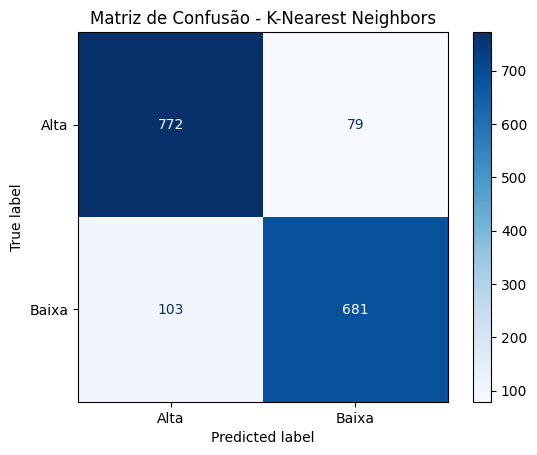

In [95]:
#Definindo os Modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}
#Criando um Dicionario para os scores
roc_auc_scores = {}
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Dicion√°rios para guardar scores
metrics_train = {}
metrics_test = {}

#Plotando a Curva
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(x_train, y_train)

    # ---- TESTE ----
    y_probs_test = model.predict_proba(x_test)[:, 1]
    y_pred_test = (y_probs_test >= 0.5).astype(int)

    test_metrics = {
        'AUC': roc_auc_score(y_test, y_probs_test),
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1': f1_score(y_test, y_pred_test)
    }

    # ---- TREINAMENTO ----
    y_probs_train = model.predict_proba(x_train)[:, 1]
    y_pred_train = (y_probs_train >= 0.5).astype(int)

    train_metrics = {
        'AUC': roc_auc_score(y_train, y_probs_train),
        'Accuracy': accuracy_score(y_train, y_pred_train),
        'Precision': precision_score(y_train, y_pred_train),
        'Recall': recall_score(y_train, y_pred_train),
        'F1': f1_score(y_train, y_pred_train)
    }

    # Salvando m√©tricas
    metrics_test[name] = test_metrics
    metrics_train[name] = train_metrics

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_probs_test)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {test_metrics["AUC"]:.2f})')

# Linha diagonal de refer√™ncia
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Impress√£o de m√©tricas
for name in models.keys():
    print(f"\nüìä Modelo: {name}")
    print("  - Teste:")
    for k, v in metrics_test[name].items():
        print(f"    {k}: {v:.2f}")
    print("  - Treinamento:")
    for k, v in metrics_train[name].items():
        print(f"    {k}: {v:.2f}")
    print("  üîç Overfitting Check (F1):", end=" ")
    train_f1 = metrics_train[name]['F1']
    test_f1 = metrics_test[name]['F1']
    if train_f1 - test_f1 > 0.10:
        print("‚ö†Ô∏è Ind√≠cio de Overfitting")
    else:
        print("‚úÖ Sem evid√™ncia forte de overfitting")

# Matriz de confus√£o do melhor modelo em termos de F1 Score no teste
best_model_name = max(metrics_test, key=lambda m: metrics_test[m]['F1'])
print(f"\nüèÜ Melhor modelo com base no F1 Score de teste: {best_model_name}")

# Reajuste para obter a matriz de confus√£o
best_model = models[best_model_name]
y_probs_best = best_model.predict_proba(x_test)[:, 1]
y_pred_best = (y_probs_best >= 0.5).astype(int)

# Matriz de Confus√£o
cm = confusion_matrix(y_test, y_pred_best)
labels = ['Alta', 'Baixa']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(cmap=plt.cm.Blues)
plt.title(f"Matriz de Confus√£o - {best_model_name}")
plt.show()

## Analisando os modelos, podemos observar que o modelo KNN obteve melhor performace preditiva, com acuracia de 89%. Contudo, a acur√°cia desse modelo foi menor do que o primeiro modelo de regress√£o log√≠stica que treinamos. Acreditamos que esse resultado pode ter ocorrido em raz√£o da limita√ß√£o do n√∫mero de itera√ß√µes.